# Mistral OCR

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import os
import base64
import json
from pathlib import Path
from dotenv import load_dotenv
from mistralai import Mistral, DocumentURLChunk
from mistralai.models import OCRResponse
from mistralai.extra import response_format_from_pydantic_model

from IPython.display import display, Markdown, Image as dImage

# Params

In [37]:
path_data = Path() / "data"
path_input = path_data / "raw"
path_output = path_data / "interim" / "mistral-ocr"  # Store converted

# also, pages are stored in `path_output_chunks` as an aditional chunking strategy

path_output.mkdir(exist_ok=True, parents=True)

In [38]:
MODEL = "mistral-ocr-latest"

# Environment Variables

In [5]:
load_dotenv()

MISTRAL_API_KEY = os.environ["MISTRAL_API_KEY"]

# Clients

In [6]:
client_mistral = Mistral(api_key=MISTRAL_API_KEY)


## PDF Conversion

In [39]:
input_file = "Divulgacion-Planetaria-Althera.pdf"  # document per local path or URL
output_file = "Divulgacion-Planetaria-Althera.md"
input_doc_path = path_input / input_file


# Read PDF
pdf_file = Path(input_doc_path)
assert pdf_file.is_file()

# Upload PDF
uploaded_file = client_mistral.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)
signed_url = client_mistral.files.get_signed_url(file_id=uploaded_file.id, expiry=1)


In [40]:
print(f"{uploaded_file.id=}")

uploaded_file.id='e46d0923-6983-433d-b99e-1061897d487d'


In [41]:
client_mistral.files.list()

ListFilesOut(data=[FileSchema(id='e46d0923-6983-433d-b99e-1061897d487d', object='file', size_bytes=1329851, created_at=1769032985, filename='Divulgacion-Planetaria-Althera', purpose='ocr', sample_type='ocr_input', source='upload', num_lines=0, mimetype='application/pdf', signature='81ef6de5c33f7ff1a8dd4c505c6c083b'), FileSchema(id='e5ec9a39-3543-4459-9052-40fa5a2659c4', object='file', size_bytes=1316141, created_at=1757270807, filename='Divulgacion Planetaria Althera', purpose='ocr', sample_type='ocr_input', source='upload', num_lines=0, mimetype='application/pdf', signature='34e1bec7e8e39ee66a2d2a302914cf9a'), FileSchema(id='20e3b1f8-cf25-40a4-bdd8-169e90de5e2c', object='file', size_bytes=1359430, created_at=1756929287, filename='Divulgacion Planetaria Althera', purpose='ocr', sample_type='ocr_input', source='upload', num_lines=0, mimetype='application/pdf', signature='6141af7ff9c8b9bcb96373eafebc6a50')], object='list', total=3)

In [42]:
# OCR
pdf_response = client_mistral.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url), 
    model=MODEL, 
    include_image_base64=True
    )

In [43]:
type(pdf_response)

mistralai.models.ocrresponse.OCRResponse

## Pages

* Tables are extracted and inserted into the markdown
* In general, headers and footers are ignored

In [11]:
Markdown(pdf_response.pages[0].markdown)

Un nuevo y fascinante vecino: Althéra

Índice

1. Historia del descubrimiento
2. Conoce a Althéra
3. Los soles de Althéra
4. Estructura general de Althéra
5. Planetas interiores
6. Planetas exteriores
7. Lunas y satélites menores
8. Fenómenos destacados
9. Habitabilidad y astrobiología
10. Conclusiones y perspectivas futuras

1. Historia del descubrimiento

1.1 Primeras observaciones y sospechas iniciales

El sistema binario Althéra (HD 4579 AB) fue detectado por primera vez en el año 2032 durante una campaña de observación del Observatorio Espacial James Webb, dirigida por la astrofísica chilena Dra. Mariela Estay. La misión principal era estudiar la composición atmosférica de exoplanetas candidatos a la habitabilidad, pero un patrón anómalo en el flujo luminoso proveniente de la constelación de Orión llamó la atención del equipo. El análisis de curvas de luz reveló oscilaciones periódicas dobles, un indicio claro de la presencia de dos estrellas en órbita mutua y varios cuerpos orbitando de forma circumbinaria.

1.2 Confirmación mediante técnicas combinadas

En los meses siguientes, un consorcio internacional liderado por la Agencia Espacial Europea (ESA) y el Instituto Max Planck de Astronomía desplegó observaciones complementarias utilizando:

- ELT (Extremely Large Telescope) en el Desierto de Atacama para espectroscopía de alta resolución.
- Telescopio Espacial Nancy Grace Roman para fotometría de gran precisión en tránsitos.
- Interferometría de radio desde la red Very Long Baseline Array (VLBA) para afinar la distancia y parámetros orbitales del sistema.

In [44]:
Markdown(pdf_response.pages[3].markdown)  # image ref and table

Divulgación Planetaria: 2025-12

- Althéra A (HD 4579 A): estrella de tipo F7V, más caliente y luminosa que el Sol, con un tono blanco-dorado.
- Althéra B (HD 4579 B): estrella de tipo K2V, más fría y longeva, de tonalidad naranja intensa.

Esta combinación de espectros produce un ambiente luminoso único en los planetas circumbinarios, donde la radiación es más equilibrada en el rango visible y cercana al infrarrojo, favoreciendo la fotosíntesis de potenciales formas de vida adaptadas a ambas fuentes.

## 3.2 Masas, radios y luminosidades comparadas

El sistema binario Althéra está formado por dos estrellas de características bien contrastadas:

Althéra A, más masiva y luminosa, con 1,28 masas solares, un radio de 1,32 radios solares y una temperatura superficial de 6.350 K, y Althéra B, más pequeña y fría, con 0,82 masas solares, 0,74 radios solares y 4.950 K. Aunque la luminosidad de Althéra A (2,4 veces la del Sol) domina el aporte energético global, la presencia de Althéra B, con una luminosidad de 0,39 L, actúa como un regulador térmico que suaviza las variaciones extremas de temperatura en la zona habitable, contribuyendo a su estabilidad a largo plazo.

![img-0.jpeg](img-0.jpeg)

|  Parámetro | Althéra A | Althéra B  |
| --- | --- | --- |
|  Masa | 1,28 M⊙ | 0,82 M⊙  |
|  Radio | 1,32 R⊙ | 0,74 R⊙  |
|  Luminosidad | 2,4 L⊙ | 0,39 L⊙  |
|  Temperatura superficial | 6.350 K | 4.950 K  |

La diferencia de luminosidad significa que, aunque Althéra A domina el aporte energético, Althéra B contribuye de manera significativa a la estabilidad térmica del sistema, suavizando las variaciones extremas en la zona habitable.

Página 4 | 18

In [45]:
Markdown(pdf_response.pages[5].markdown)  # plot (title and x-axis content) ref and table

Divulgación Planetaria: 2025-12

## 4. Estructura general del sistema planetario

### 4.1 Distribución de órbitas y distancias medias

El sistema circumbinario de **Althéra** alberga cinco planetas principales, múltiples lunas y un cinturón de asteroides prominente. Las órbitas son relativamente coplanares, con inclinaciones menores a $3^{\circ}$, lo que sugiere una formación a partir de un disco protoplanetario bien definido.

![img-1.jpeg](img-1.jpeg)
Planetas del sistema Althéra: distancia vs masa

In [47]:
pdf_response.pages[-4].markdown

'Anexo: Estabilidad de órbitas circumbinarias (Holman &amp; Wiegert, 1999)\n\nComo anexo al estudio de la arquitectura orbital de Althéra, resulta relevante considerar el límite teórico de estabilidad circumbinaria definido por Holman &amp; Wiegert (1999). Esta formulación permite calcular la distancia mínima a la que un planeta puede mantener una órbita estable alrededor de dos estrellas, en función de la separación, la excentricidad del binario y la relación de masas estelares. Aplicado a Althéra, el valor obtenido es de aproximadamente 1,19 UA, lo que implica que cualquier órbita interior a esa distancia sufriría perturbaciones gravitatorias capaces de desestabilizarla a largo plazo. Sin embargo, al incorporar factores adicionales como resonancias con los gigantes exteriores, excentricidades planetarias y variaciones inducidas por la actividad estelar, el margen práctico de seguridad se sitúa en torno a 1,8 UA. Esta cifra explica por qué no se observan planetas estables más cerca de

In [46]:
Markdown(pdf_response.pages[-4].markdown) # formulas

Anexo: Estabilidad de órbitas circumbinarias (Holman &amp; Wiegert, 1999)

Como anexo al estudio de la arquitectura orbital de Althéra, resulta relevante considerar el límite teórico de estabilidad circumbinaria definido por Holman &amp; Wiegert (1999). Esta formulación permite calcular la distancia mínima a la que un planeta puede mantener una órbita estable alrededor de dos estrellas, en función de la separación, la excentricidad del binario y la relación de masas estelares. Aplicado a Althéra, el valor obtenido es de aproximadamente 1,19 UA, lo que implica que cualquier órbita interior a esa distancia sufriría perturbaciones gravitatorias capaces de desestabilizarla a largo plazo. Sin embargo, al incorporar factores adicionales como resonancias con los gigantes exteriores, excentricidades planetarias y variaciones inducidas por la actividad estelar, el margen práctico de seguridad se sitúa en torno a 1,8 UA. Esta cifra explica por qué no se observan planetas estables más cerca del centro binario y por qué Aurelia III, ubicada en el corazón de la zona habitable, disfruta de condiciones dinámicamente estables.

Límite interior teórico de estabilidad para órbitas circumbinarias:
$$
a_{crit} = a_b \left[ 1.60 + 5.10 e_b - 2.22 e_b^2 + 4.12 \mu - 4.27 e_b \mu - 5.09 \mu^2 + 4.61 e_b^2 \mu^2 \right]
$$

## Parámetros de Althéra:

- Separación media del binario: $a_b = 0,42$ UA
- Excentricidad del binario: $e_b = 0,12$
- Masas estelares: $M_A = 1,28 M_\odot, M_B = 0,82 M_\odot$
- Relación de masas: $\mu = \frac{M_B}{M_A + M_B} = \frac{0,82}{1,28 + 0,82} \approx 0,3905$

## Sustituyendo:

$$
factor \approx 2,8228 \Rightarrow a_{crit} = 0,42 \times 2,8228 \approx 1,186$ UA

## Interpretación:

$a_{crit}$ indica el límite interior teórico por debajo del cual las órbitas circumbinarias tienden a ser inestables. En la práctica, y considerando resonancias con los gigantes exteriores, excentricidades planetarias y actividad estelar, adoptamos un margen conservador $\approx 1,8$ UA como borde operativo de estabilidad. Este valor es coherente con la arquitectura descrita y con la ubicación de Aurelia III en pleno dominio estable.

In [48]:
Markdown(pdf_response.pages[-3].markdown) # image ref

Divulgación Planetaria: 2025-12

# Anexo: Miscelánea

![img-2.jpeg](img-2.jpeg)
Figure 3 Notas de Mariela Estay el día del descubrimiento

Página 16 | 18

In [49]:
Markdown(pdf_response.pages[-2].markdown) # long table

Divulgación Planetaria: 2025-12

Anexo: Listado de cuerpos menores

|  Nombre | Tamaño | Descripción  |
| --- | --- | --- |
|  Arges-1
"Pyron" | 320 km | Asteroide metálico (tipo M) con alto contenido en hierro-níquel; órbita estable en el centro del Cinturón de Arges.  |
|  Arges-2
"Lythos" | 210 km | Asteroide rocoso (tipo S), superficie muy fracturada por impactos antiguos.  |
|  Arges-3
"Calyx" | 95 km | Asteroide carbonáceo oscuro (tipo C) con albedo extremadamente bajo.  |
|  Arges-4
"Virel" | 180 km | Asteroide mixto roca-hielo, probable remanente de un protoplaneta fallido.  |
|  Arges-5
"Thal" | 60 km | Asteroide alargado con rotación rápida; posible binario de contacto.  |
|  Arges-6
"Mordax" | 140 km | Asteroide metálico brillante, detectable desde Aurelia III por reflexión solar.  |
|  Arges-7
"Nysa" | 72 km | Asteroide rico en silicatos claros; alto albedo relativo.  |
|  Arges-8
"Kelmon" | 55 km | Asteroide orgánico con compuestos volátiles congelados en el subsuelo.  |
|  Arges-9
"Orveth" | 410 km | El mayor objeto del cinturón; posible planeta enano con forma casi esférica.  |

Página 17 | 18

In [50]:
Markdown(pdf_response.pages[-1].markdown) # long table

Divulgación Planetaria: 2025-12

|  Nombre | Tamaño | Descripción  |
| --- | --- | --- |
|  Arges-10 "Silpha" | 88 km | Asteroide con superficie estriada por fuerzas de marea pasadas.  |
|  Arges-11 "Rhyx" | 34 km | Asteroide irregular con órbita ligeramente excéntrica.  |
|  Arges-12 "Eron" | 120 km | Asteroide tipo S con vetas metálicas expuestas.  |
|  Arges-13 "Kyris" | 67 km | Asteroide binario; dos lóbulos unidos por un cuello estrecho.  |
|  Arges-14 "Damar" | 200 km | Asteroide diferenciado con núcleo metálico parcial.  |
|  Arges-15 "Ulren" | 48 km | Asteroide poroso, probable pila de escombros.  |
|  Arges-16 "Phor" | 160 km | Asteroide oscuro con fuerte absorción en infrarrojo.  |
|  Arges-17 "Nyxel" | 92 km | Asteroide rico en carbono con trazas de aminoácidos simples.  |
|  Arges-18 "Vaelor" | 130 km | Asteroide rocoso con inclinación orbital elevada.  |
|  Arges-19 "Ithra" | 58 km | Asteroide con rotación caótica, probablemente tras una colisión reciente.  |

Página 18 | 18

## Images

Image content (as text) is not available

[OCRImageObject(id='img-0.jpeg', top_left_x=621, top_left_y=701, bottom_right_x=1447, bottom_right_y=1251, image_base64='', image_annotation=None)]
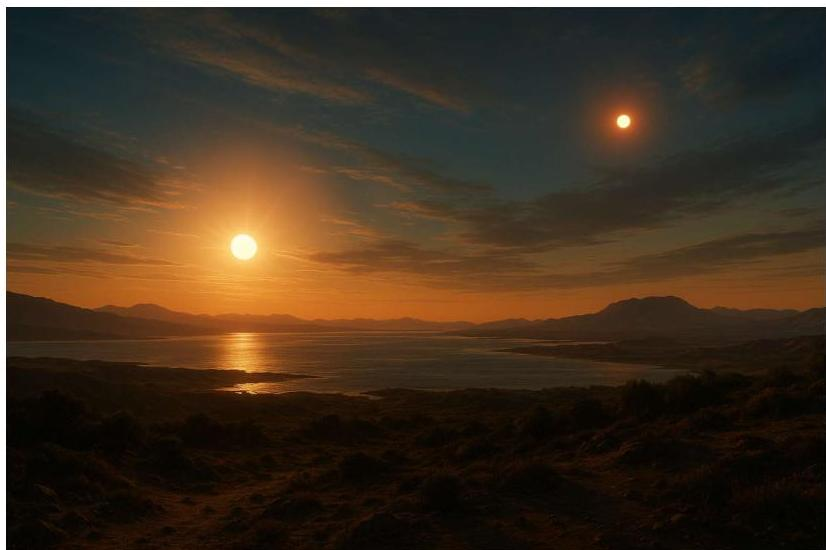

In [51]:
pdf_response.pages[3].images

[OCRImageObject(id='img-1.jpeg', top_left_x=236, top_left_y=647, bottom_right_x=1412, bottom_right_y=1401, image_base64='', image_annotation=None)]
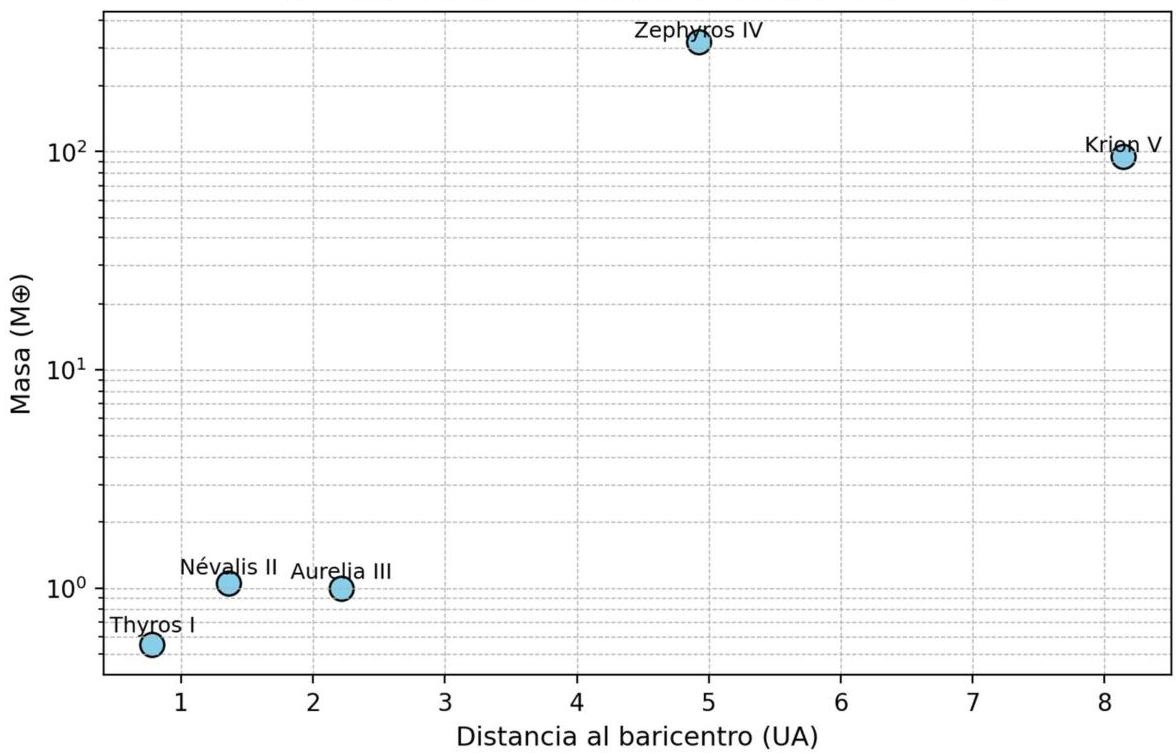

In [19]:
pdf_response.pages[5].images

### Export to Markdown

In [20]:
# With no images

doc_md = "\n\n".join([page.markdown for page in pdf_response.pages])

output_doc_path = path_output/ output_file

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md)

In [ ]:
# With embedded images

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str


def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

output_doc_path = path_output/ "Divulgacion-Planetaria-Althera-wimgtb.md"  # incrustada
doc_md_wimgtb = get_combined_markdown(pdf_response)

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md_wimgtb)

# Annotations API


BBOX Annotations:
* SEcond stage with a VLM to analyze every element BBox with the provided instructions  

Document Annotation:
* pdf/image: All pages to image and prompt them to a VLM
* pptx/docx/...: Pages to MD and send to a VLM
* ONLY UP TO 8 PAGES



### BBox Annotations

In [53]:
from pydantic import BaseModel, Field

# BBOX Annotation response formats
class Image(BaseModel):
  image_type: str = Field(..., description="The type of the image.")
  short_description: str = Field(..., description="A description in Spanish describing the image.")
  content: str = Field(None, description="Extract and organize only the text content from the image. If there is no text, leave it empty")
  summary: str = Field(..., description="Summarize the image.")

  # ... -> “Don’t assign a default, the user must provide a value for this field.”


# Document Annotation response format
class Document(BaseModel):
  language: str = Field(..., description="Language in ISO 639 code")
  chapter_titles: list[str] = Field(..., description="Get sections/subsections structure up to the bottom level. Include section number of generate them")
  urls: list[str]

In [54]:
response_bbox_annot = client_mistral.ocr.process(
    model=MODEL,
    document=DocumentURLChunk(
      document_url=signed_url.url
    ),
    bbox_annotation_format=response_format_from_pydantic_model(Image),  # <-

    include_image_base64=True
  )

{
  "image_type": "nature",
  "short_description": "Una imagen de un atardecer sobre un lago con montañas en la distancia.",
  "content": "",
  "summary": "La imagen muestra un paisaje natural durante el atardecer. El sol se está poniendo sobre un lago tranquilo, creando reflejos dorados en el agua. En la distancia, se pueden ver montañas oscuras que contrastan con el cielo anaranjado y azul. La escena es serena y pacífica, capturando la belleza de la naturaleza."
}


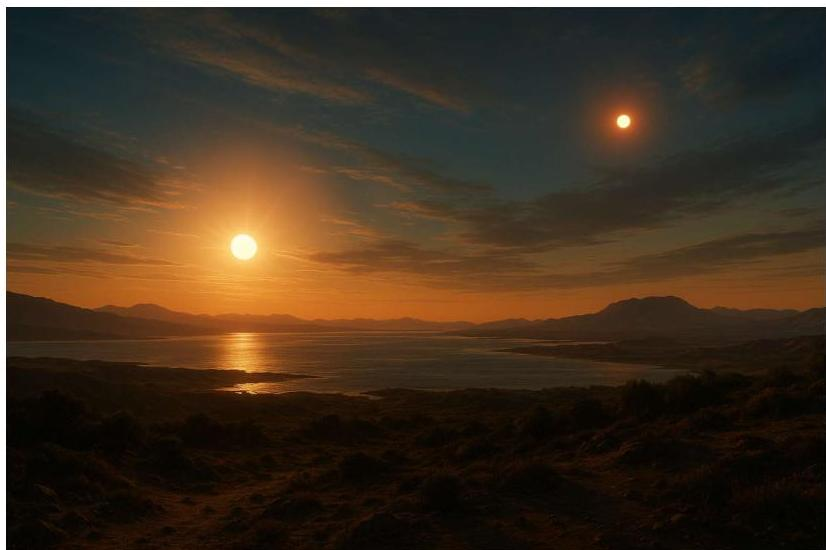

In [55]:
ex_image_mistral= response_bbox_annot.pages[3].images[0]
print(ex_image_mistral.image_annotation)


b64_str = ex_image_mistral.image_base64
b64_data = b64_str.split(",")[1]
dImage(data=base64.b64decode(b64_data))



In [56]:
len(response_bbox_annot.pages)

18

{
  "image_type": "Scatter plot",
  "short_description": "Gráfico de dispersión que muestra la masa de varios objetos en función de su distancia al baricentro.",
  "content": "Masa (M⊕) vs. Distancia al baricentro (UA) con puntos etiquetados como Thyros I, Nevalis II, Aurelia III, Zephyros IV, Krien V.",
  "summary": "El gráfico muestra la relación entre la masa de varios objetos y su distancia al baricentro. Los objetos están etiquetados y se distribuyen en un rango de distancias y masas, con Thyros I siendo el más cercano y de menor masa, y Krien V siendo el más lejano y de mayor masa."
}


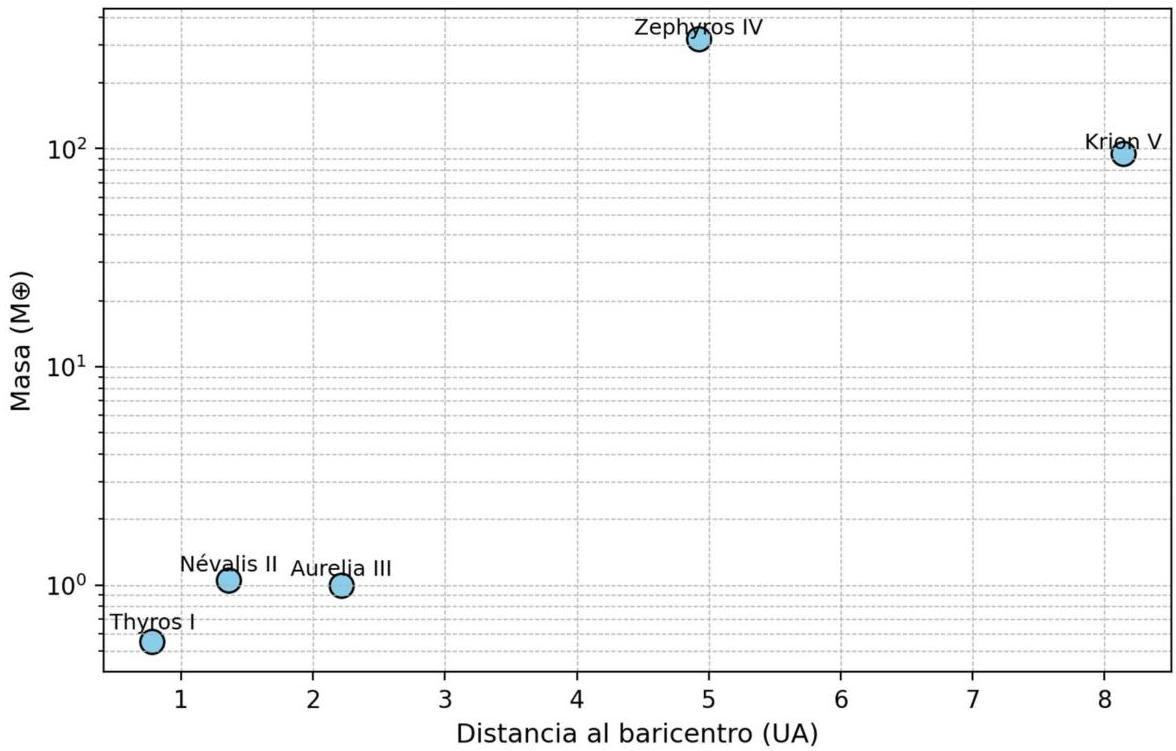

In [57]:
ex_image_mistral= response_bbox_annot.pages[5].images[0]
print(ex_image_mistral.image_annotation)


b64_str = ex_image_mistral.image_base64
b64_data = b64_str.split(",")[1]
dImage(data=base64.b64decode(b64_data))


In [58]:
len(response_bbox_annot.pages)

18

{
  "image_type": "handwritten notes",
  "short_description": "Imagen de notas escritas a mano sobre estrellas.",
  "content": "Bellafrix, Betelgeuse, Althera, Rigel, Sciph",
  "summary": "La imagen contiene notas escritas a mano sobre varias estrellas, incluyendo Bellafrix, Betelgeuse, Althera, Rigel y Sciph. Las notas mencionan una campaña del 13 de octubre de 2034, oscilaciones periódicas dobles, un posible sistema binario y la posibilidad de exoplanetas."
}


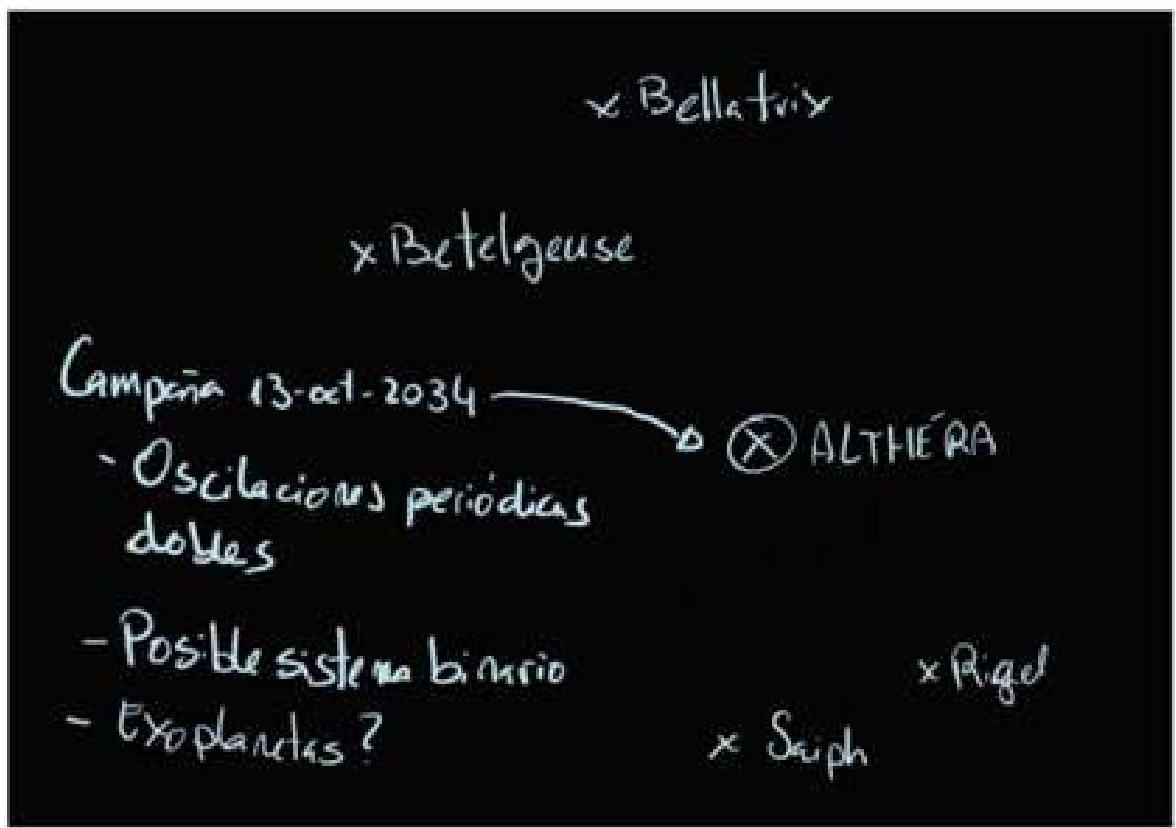

In [59]:
ex_image_mistral= response_bbox_annot.pages[15].images[0]
print(ex_image_mistral.image_annotation)


b64_str = ex_image_mistral.image_base64
b64_data = b64_str.split(",")[1]
dImage(data=base64.b64decode(b64_data))
# check extracted content

### Document Annotations

In [60]:
response_doc_annot = client_mistral.ocr.process(
    model=MODEL,
    document=DocumentURLChunk(
      document_url=signed_url.url
    ),
    document_annotation_format=response_format_from_pydantic_model(Document),
    pages=list(range(8)),  # limit
    include_image_base64=True
  )

In [61]:
json.loads(response_doc_annot.document_annotation)

{'language': 'es',
 'chapter_titles': ['1. Historia del descubrimiento',
  '1.1 Primeras observaciones y sospechas iniciales',
  '1.2 Confirmación mediante técnicas combinadas',
  '1.3 Descubrimiento revolucionario de la zona habitable circumbinaria',
  '1.4 Importancia científica y proyección futura',
  '2. Conoce a Althéra',
  '2.1 Localización en la galaxia',
  '2.2 Disposición y dinámica de un sistema binario',
  '2.3 Singularidades astronómicas',
  '3. Los soles de Althéra',
  '3.1 Clasificación espectral y diferencias principales',
  '3.2 Masas, radios y luminosidades comparadas',
  '3.3 Ciclo de vida y edad estimada del sistema binario',
  '3.4 Interacción gravitatoria y efectos sobre la zona habitable',
  '4. Estructura general del sistema planetario',
  '4.1 Distribución de órbitas y distancias medias',
  '4.2 Tipología de planetas',
  '4.3 Cinturones de asteroides y discos de escombros',
  '4.4 Estabilidad orbital en un sistema binario',
  '5. Planetas interiores',
  '5.1 Thy

## Replace images with annotations to insert the image text content in the MD

In [62]:
def replace_images_in_markdown_with_annot(markdown_str: str, images_dict: dict) -> str:
    """
    Replace images in Markdown string with annotations.

    This function searches for image references (e.g. ![img-0.jpeg](img-0.jpeg))
    in the provided Markdown string and replaces each image with its corresponding 
    annotation string from the provided dictionary.

    Args:
        markdown_str (str): The input Markdown string containing image references.
        images_dict (dict): A dictionary where keys are image names (as they 
                            appear in the Markdown) and values are the respective 
                            annotation strings to replace them with.

    Returns:
        str: The modified Markdown string with images replaced by annotations.
    """
    for img_name, annot_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({annot_str})")
    return markdown_str




replace_images_in_markdown_with_annot(
    markdown_str="Senatvs Popvlvs Qve Romanvs ![img-0.jpeg](img-0.jpeg))",
    images_dict={"img-0.jpeg": "SQPR"}
)

'Senatvs Popvlvs Qve Romanvs ![img-0.jpeg](SQPR))'

In [63]:




def get_annot_markdown(ocr_response: OCRResponse) -> str:
  """
  Generates a markdown representation of OCR annotated text by replacing image placeholders
  in the markdown with their corresponding annotations from the OCR response.

  Args:
      ocr_response (OCRResponse): The response object containing OCR data, including pages and images.

  Returns:
      str: The markdown string with images replaced by their annotations.
  """

  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = json.loads(img.image_annotation)['summary']
    markdowns.append(replace_images_in_markdown_with_annot(page.markdown, image_data))

  return "\n\n".join(markdowns)

In [33]:
output_doc_path = path_output/ "Divulgacion-Planetaria-Althera-wimgannot.md"  # no images, inserted content
doc_md_wimgannot = get_annot_markdown(response_bbox_annot)

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md_wimgannot)

# Save page chunks

In [34]:
path_output_chunks = path_data / "processed" / "chunks" / "pages" 

path_output_chunks.mkdir(
    parents=True, exist_ok=True
)

dc_chunks = []

for page in pdf_response.pages:
    dc_chunks.append(
        {"page_content": page.markdown, "metadata": {"source": "Althera"}}
        )

with open(path_output_chunks / 'Althera.json', 'w') as f:
    json.dump(dc_chunks, f)

# Resultados:
* Muy buena calidad de conversión a MD, extracción de contenido en imágenes y procesamiento de formulas
* Fallos en captura de encabezados y jerarquía de los mismos